In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import numpy as np
import warnings
warnings = 'ignore'
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.filterwarnings("ignore")
c_green = '#6DF10C'
c_yellow = '#F5DD0D'
c_cyan = '#0FFDEF'
c_blue = '#0141DE'
c_blue_light =  '#2775FD'
c_purple = '#FF0DE5'
c_green_dark = '#1BB200'
e = np.e

<img src = 'https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F11258622%2F56e1ffbe107dcf0df92e223466d0dceb%2Fstocks-market-scaled.jpg?generation=1687862919849498&alt=media' width = '1200'>

## Overview
This is an Indian stock Market data which can be used for educational, business and personal usage. This data conains stock prices of NIFTY-50 index which contains top 50 companies of India. The dataset is taken from Yahoo Finance (yfinance) python package. Mostly dataset contains data from 3 Jan 2000 to June 2023.

## Dataset Columns

The date for every symbol is saved in CSV format with common fields:

Date - specifies date of that trade

Open - opening price

High - maximum price during the day

Low - minimum price during the day

Close - close price adjusted for splits

Adj Close - adjusted close price adjusted for both dividends and splits.

Volume - the number of shares that changed hands during a given day

In [99]:
df = pd.read_csv('csv\\HDFC_BANK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,03-01-2000,16.600000,17.000000,16.600000,17.000000,14.130294,332590.0,16.86666667
1,04-01-2000,18.200001,18.344999,17.100000,17.379999,14.446147,1687100.0,17.60833267
2,05-01-2000,17.000000,17.389999,16.500000,16.695000,13.876776,1598200.0,16.86166633
3,06-01-2000,16.799999,17.000000,16.530001,16.830000,13.988990,850260.0,16.786667
4,07-01-2000,16.215000,17.100000,16.215000,16.834999,13.993143,851440.0,16.71666633
...,...,...,...,...,...,...,...,...
5868,19-06-2023,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333
5869,20-06-2023,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008
5870,21-06-2023,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992
5871,22-06-2023,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5873 entries, 0 to 5872
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5873 non-null   object 
 1   Open       5866 non-null   float64
 2   High       5866 non-null   float64
 3   Low        5866 non-null   float64
 4   Close      5866 non-null   float64
 5   Adj Close  5866 non-null   float64
 6   Volume     5866 non-null   float64
 7   VWAP       5873 non-null   object 
dtypes: float64(6), object(2)
memory usage: 367.2+ KB


In [101]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP'], dtype='object')

In [102]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'] , format='mixed')
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [103]:
split_date(df)

In [104]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,2000-03-01,16.600000,17.000000,16.600000,17.000000,14.130294,332590.0,16.86666667,2000,3,1,9
1,2000-04-01,18.200001,18.344999,17.100000,17.379999,14.446147,1687100.0,17.60833267,2000,4,1,13
2,2000-05-01,17.000000,17.389999,16.500000,16.695000,13.876776,1598200.0,16.86166633,2000,5,1,18
3,2000-06-01,16.799999,17.000000,16.530001,16.830000,13.988990,850260.0,16.786667,2000,6,1,22
4,2000-07-01,16.215000,17.100000,16.215000,16.834999,13.993143,851440.0,16.71666633,2000,7,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2023-06-19,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333,2023,6,19,25
5869,2023-06-20,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008,2023,6,20,25
5870,2023-06-21,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992,2023,6,21,25
5871,2023-06-22,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358,2023,6,22,25


In [105]:
df.dropna(inplace=True)

In [106]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
VWAP          0
Year          0
Month         0
Day           0
WeekOfYear    0
dtype: int64

In [107]:
numeric_cols = df.drop(columns=['Date' , 'Close']).columns.to_list()
input_cols = df.drop(columns=['Date' , 'Close']).columns.to_list()
target_col = 'Close'

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,2000-03-01,16.600000,17.000000,16.600000,17.000000,14.130294,332590.0,16.86666667,2000,3,1,9
1,2000-04-01,18.200001,18.344999,17.100000,17.379999,14.446147,1687100.0,17.60833267,2000,4,1,13
2,2000-05-01,17.000000,17.389999,16.500000,16.695000,13.876776,1598200.0,16.86166633,2000,5,1,18
3,2000-06-01,16.799999,17.000000,16.530001,16.830000,13.988990,850260.0,16.786667,2000,6,1,22
4,2000-07-01,16.215000,17.100000,16.215000,16.834999,13.993143,851440.0,16.71666633,2000,7,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2023-06-19,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333,2023,6,19,25
5869,2023-06-20,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008,2023,6,20,25
5870,2023-06-21,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992,2023,6,21,25
5871,2023-06-22,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358,2023,6,22,25


In [110]:
df[numeric_cols]

,Open,High,Low,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,16.600000,17.000000,16.600000,14.130294,332590.0,16.86666667,2000,3,1,9
1,18.200001,18.344999,17.100000,14.446147,1687100.0,17.60833267,2000,4,1,13
2,17.000000,17.389999,16.500000,13.876776,1598200.0,16.86166633,2000,5,1,18
3,16.799999,17.000000,16.530001,13.988990,850260.0,16.786667,2000,6,1,22
4,16.215000,17.100000,16.215000,13.993143,851440.0,16.71666633,2000,7,1,26
...,...,...,...,...,...,...,...,...,...,...
5868,1611.000000,1614.250000,1598.349976,1604.150024,12414573.0,1605.583333,2023,6,19,25
5869,1604.150024,1611.000000,1590.650024,1607.500000,10002813.0,1603.050008,2023,6,20,25
5870,1616.000000,1637.250000,1611.000000,1635.599976,12154473.0,1627.949992,2023,6,21,25
5871,1640.000000,1657.550049,1639.050049,1643.599976,28298070.0,1646.733358,2023,6,22,25


In [111]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [112]:

df[numeric_cols] = scaler.transform(df[numeric_cols])

In [113]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,2000-03-01,0.000226,0.000122,0.000538,17.000000,0.000324,0.001654,0.000347,0.0,0.181818,0.000000,0.153846
1,2000-04-01,0.001165,0.000905,0.000838,17.379999,0.000510,0.008388,0.000783,0.0,0.272727,0.000000,0.230769
2,2000-05-01,0.000461,0.000349,0.000479,16.695000,0.000174,0.007946,0.000344,0.0,0.363636,0.000000,0.326923
3,2000-06-01,0.000343,0.000122,0.000497,16.830000,0.000240,0.004227,0.000300,0.0,0.454545,0.000000,0.403846
4,2000-07-01,0.000000,0.000180,0.000308,16.834999,0.000243,0.004233,0.000259,0.0,0.545455,0.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2023-06-19,0.936025,0.930021,0.946901,1604.150024,0.938594,0.061724,0.934791,1.0,0.454545,0.600000,0.461538
5869,2023-06-20,0.932004,0.928129,0.942294,1607.500000,0.940571,0.049733,0.933301,1.0,0.454545,0.633333,0.461538
5870,2023-06-21,0.938959,0.943411,0.954469,1635.599976,0.957153,0.060431,0.947946,1.0,0.454545,0.666667,0.461538
5871,2023-06-22,0.953046,0.955230,0.971252,1643.599976,0.961873,0.140695,0.958994,1.0,0.454545,0.700000,0.461538


## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [114]:
year = pd.to_datetime(df.Date).dt.year

In [115]:
train_df = df[year < 2021]
val_df = df[year == 2022]
test_df = df[year > 2022]

In [116]:
X_train = train_df[numeric_cols]
X_val = val_df[numeric_cols]
X_test = test_df[numeric_cols]

In [117]:
X_train

,Open,High,Low,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,0.000226,0.000122,0.000538,0.000324,0.001654,0.000347,0.000000,0.181818,0.000000,0.153846
1,0.001165,0.000905,0.000838,0.000510,0.008388,0.000783,0.000000,0.272727,0.000000,0.230769
2,0.000461,0.000349,0.000479,0.000174,0.007946,0.000344,0.000000,0.363636,0.000000,0.326923
3,0.000343,0.000122,0.000497,0.000240,0.004227,0.000300,0.000000,0.454545,0.000000,0.403846
4,0.000000,0.000180,0.000308,0.000243,0.004233,0.000259,0.000000,0.545455,0.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...
5254,0.805961,0.807616,0.814467,0.794226,0.037170,0.809578,0.869565,1.000000,0.766667,0.980769
5255,0.815118,0.817513,0.830621,0.803270,0.029084,0.821293,0.869565,1.000000,0.900000,1.000000
5256,0.824538,0.825518,0.840194,0.811510,0.036035,0.829939,0.869565,1.000000,0.933333,1.000000
5257,0.835601,0.828517,0.836006,0.814554,0.040314,0.830615,0.869565,1.000000,0.966667,1.000000


In [118]:
train_targets = train_df[target_col]
val_targets = val_df[target_col]
test_targets = test_df[target_col]

In [119]:
train_targets

0         17.000000
1         17.379999
2         16.695000
3         16.830000
4         16.834999
           ...     
5254    1397.099976
5255    1412.849976
5256    1427.199951
5257    1432.500000
5258    1436.300049
Name: Close, Length: 5252, dtype: float64

In [120]:
train_df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,2000-03-01,0.000226,0.000122,0.000538,17.000000,0.000324,0.001654,0.000347,0.000000,0.181818,0.000000,0.153846
1,2000-04-01,0.001165,0.000905,0.000838,17.379999,0.000510,0.008388,0.000783,0.000000,0.272727,0.000000,0.230769
2,2000-05-01,0.000461,0.000349,0.000479,16.695000,0.000174,0.007946,0.000344,0.000000,0.363636,0.000000,0.326923
3,2000-06-01,0.000343,0.000122,0.000497,16.830000,0.000240,0.004227,0.000300,0.000000,0.454545,0.000000,0.403846
4,2000-07-01,0.000000,0.000180,0.000308,16.834999,0.000243,0.004233,0.000259,0.000000,0.545455,0.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...,...,...
5254,2020-12-24,0.805961,0.807616,0.814467,1397.099976,0.794226,0.037170,0.809578,0.869565,1.000000,0.766667,0.980769
5255,2020-12-28,0.815118,0.817513,0.830621,1412.849976,0.803270,0.029084,0.821293,0.869565,1.000000,0.900000,1.000000
5256,2020-12-29,0.824538,0.825518,0.840194,1427.199951,0.811510,0.036035,0.829939,0.869565,1.000000,0.933333,1.000000
5257,2020-12-30,0.835601,0.828517,0.836006,1432.500000,0.814554,0.040314,0.830615,0.869565,1.000000,0.966667,1.000000


In [121]:
val_df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
5507,2022-03-01,0.862072,0.876897,0.876391,1519.650024,0.868374,0.022546,0.877228,0.956522,0.181818,0.000000,0.153846
5508,2022-04-01,0.882614,0.882660,0.892725,1528.550049,0.873506,0.022019,0.886267,0.956522,0.272727,0.000000,0.230769
5509,2022-05-01,0.892475,0.905424,0.904870,1564.849976,0.894441,0.035630,0.905029,0.956522,0.363636,0.000000,0.307692
5510,2022-06-01,0.896114,0.895381,0.906037,1539.750000,0.879965,0.023937,0.897109,0.956522,0.454545,0.000000,0.403846
5511,2022-07-01,0.896701,0.902367,0.909537,1550.550049,0.886194,0.027791,0.902726,0.956522,0.545455,0.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...,...,...
5750,2022-12-26,0.929275,0.944430,0.941905,1629.449951,0.942622,0.024629,0.942967,0.956522,1.000000,0.833333,0.980769
5751,2022-12-27,0.948937,0.942655,0.955965,1631.099976,0.943584,0.019706,0.947299,0.956522,1.000000,0.866667,0.980769
5752,2022-12-28,0.943127,0.940937,0.961709,1629.800049,0.942826,0.021608,0.948348,0.956522,1.000000,0.900000,0.980769
5753,2022-12-29,0.941366,0.947050,0.954469,1641.300049,0.949535,0.027378,0.950289,0.956522,1.000000,0.933333,0.980769


In [122]:
test_df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
5755,2023-02-01,0.945416,0.944867,0.958987,1628.699951,0.942184,0.010892,0.948564,1.0,0.090909,0.000000,0.076923
5756,2023-03-01,0.942598,0.946759,0.961170,1639.349976,0.948397,0.020827,0.952005,1.0,0.181818,0.000000,0.153846
5757,2023-04-01,0.950111,0.948360,0.952076,1610.050049,0.931304,0.025734,0.943819,1.0,0.272727,0.000000,0.230769
5758,2023-05-01,0.938373,0.932233,0.941546,1599.699951,0.925265,0.027200,0.932909,1.0,0.363636,0.000000,0.326923
5759,2023-06-01,0.930742,0.927023,0.934845,1594.400024,0.922173,0.022603,0.927919,1.0,0.454545,0.000000,0.403846
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2023-06-19,0.936025,0.930021,0.946901,1604.150024,0.938594,0.061724,0.934791,1.0,0.454545,0.600000,0.461538
5869,2023-06-20,0.932004,0.928129,0.942294,1607.500000,0.940571,0.049733,0.933301,1.0,0.454545,0.633333,0.461538
5870,2023-06-21,0.938959,0.943411,0.954469,1635.599976,0.957153,0.060431,0.947946,1.0,0.454545,0.666667,0.461538
5871,2023-06-22,0.953046,0.955230,0.971252,1643.599976,0.961873,0.140695,0.958994,1.0,0.454545,0.700000,0.461538


### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [123]:
def rmse(targets , predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

def mse(targets , predictions):
    return np.mean(np.square(targets-predictions))

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
X_train

,Open,High,Low,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,0.000226,0.000122,0.000538,0.000324,0.001654,0.000347,0.000000,0.181818,0.000000,0.153846
1,0.001165,0.000905,0.000838,0.000510,0.008388,0.000783,0.000000,0.272727,0.000000,0.230769
2,0.000461,0.000349,0.000479,0.000174,0.007946,0.000344,0.000000,0.363636,0.000000,0.326923
3,0.000343,0.000122,0.000497,0.000240,0.004227,0.000300,0.000000,0.454545,0.000000,0.403846
4,0.000000,0.000180,0.000308,0.000243,0.004233,0.000259,0.000000,0.545455,0.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...
5254,0.805961,0.807616,0.814467,0.794226,0.037170,0.809578,0.869565,1.000000,0.766667,0.980769
5255,0.815118,0.817513,0.830621,0.803270,0.029084,0.821293,0.869565,1.000000,0.900000,1.000000
5256,0.824538,0.825518,0.840194,0.811510,0.036035,0.829939,0.869565,1.000000,0.933333,1.000000
5257,0.835601,0.828517,0.836006,0.814554,0.040314,0.830615,0.869565,1.000000,0.966667,1.000000


In [126]:
lr_model = LinearRegression().fit(X_train ,train_targets )
train_preds = lr_model.predict(X_train)
val_preds = lr_model.predict(X_val)
test_preds = lr_model.predict(X_test)
train_rmse = rmse(train_targets,train_preds)

In [127]:
train_rmse

2.7153213849955883e-07

In [128]:
val_rmse = rmse(val_targets,val_preds)
val_rmse

8.25046096575889e-07

In [129]:
test_rmse = rmse(test_targets,test_preds)
test_rmse

8.205541943407391e-07

In [130]:
val_preds

array([1519.65002494, 1528.55004892, 1564.84997493, 1539.74999993,
       1550.55004895, 1559.15002294, 1565.90002391, 1556.65002494,
       1528.00000087, 1545.1500229 , 1521.50000096, 1529.24999893,
       1518.4499519 , 1508.99999888, 1521.5999769 , 1486.65002388,
       1488.0500499 , 1474.9499509 , 1463.24999991, 1485.69994991,
       1496.9999989 , 1531.19995093, 1515.34997593, 1523.99999991,
       1468.15002291, 1461.8499769 , 1497.59997694, 1525.09997594,
       1518.84997596, 1473.69994992, 1517.80004994, 1515.75000089,
       1506.50000092, 1512.34997691, 1522.09997692, 1510.69995094,
       1500.90002289, 1419.40002393, 1456.09997692, 1426.24999991,
       1374.24999891, 1370.99999994, 1366.49999894, 1324.80004792,
       1327.80004995, 1371.15002495, 1392.6999509 , 1396.80004795,
       1442.55004795, 1424.0000009 , 1448.15002492, 1480.05004794,
       1486.4999999 , 1494.15002287, 1479.24999891, 1442.65002289,
       1430.90002488, 1432.80004986, 1451.80004791, 1476.94995

In [131]:
val_targets

5507    1519.650024
5508    1528.550049
5509    1564.849976
5510    1539.750000
5511    1550.550049
           ...     
5750    1629.449951
5751    1631.099976
5752    1629.800049
5753    1641.300049
5754    1628.150024
Name: Close, Length: 248, dtype: float64

In [132]:
train_preds

array([  17.        ,   17.379999  ,   16.69499999, ..., 1427.19994993,
       1432.50000087, 1436.30004791])

In [133]:
numeric_cols

['Open',
 'High',
 'Low',
 'Adj Close',
 'Volume',
 'VWAP',
 'Year',
 'Month',
 'Day',
 'WeekOfYear']

In [134]:
lr_model.coef_

array([-4.64977156e-06, -1.71765994e+03, -1.67139997e+03,  9.54949201e-07,
       -1.67525633e-07,  5.10051996e+03,  1.24810470e-07,  8.01627920e-09,
       -2.48461589e-08,  1.07552278e-08])

In [135]:
lr_model.intercept_

16.339999991080447

In [136]:
def predict_input(new_input , model):
    input_df = pd.DataFrame([new_input])
    split_date(input_df)
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    prediction = model.predict(X_input)[0]
    print(f'Prediction of {model} :  {prediction} ')


In [137]:
new_input = {'Date': '2023-06-19',
             'Open': 1611,
             'High': 1614.25,
             'Low': 1598.35,
             'Adj Close': 0,
             'Volume': 12414573,
             'VWAP': 1605.583333}

In [138]:
predict_input(new_input,lr_model)

Prediction of LinearRegression() :  1604.1499980163637 


In [139]:
lr_model.feature_names_in_

array(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'VWAP', 'Year',
       'Month', 'Day', 'WeekOfYear'], dtype=object)

In [140]:
importance_lr_model_df = pd.DataFrame({
    'Feature': lr_model.feature_names_in_,
    'Importance': lr_model.coef_
    
})

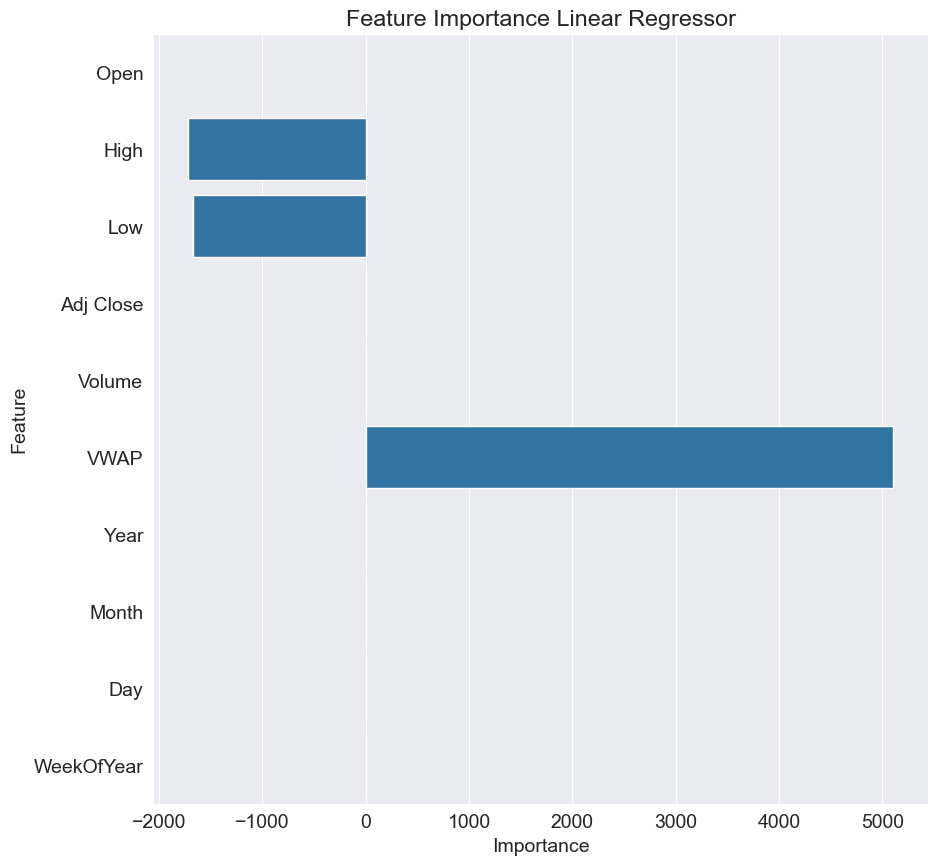

In [141]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance Linear Regressor')
sns.barplot(data=importance_lr_model_df, x='Importance', y='Feature')
plt.show()

In [142]:
df = pd.read_csv('csv\\HDFC_BANK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,03-01-2000,16.600000,17.000000,16.600000,17.000000,14.130294,332590.0,16.86666667
1,04-01-2000,18.200001,18.344999,17.100000,17.379999,14.446147,1687100.0,17.60833267
2,05-01-2000,17.000000,17.389999,16.500000,16.695000,13.876776,1598200.0,16.86166633
3,06-01-2000,16.799999,17.000000,16.530001,16.830000,13.988990,850260.0,16.786667
4,07-01-2000,16.215000,17.100000,16.215000,16.834999,13.993143,851440.0,16.71666633
...,...,...,...,...,...,...,...,...
5868,19-06-2023,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333
5869,20-06-2023,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008
5870,21-06-2023,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992
5871,22-06-2023,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358


In [143]:
split_date(df)

In [144]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,2000-03-01,16.600000,17.000000,16.600000,17.000000,14.130294,332590.0,16.86666667,2000,3,1,9
1,2000-04-01,18.200001,18.344999,17.100000,17.379999,14.446147,1687100.0,17.60833267,2000,4,1,13
2,2000-05-01,17.000000,17.389999,16.500000,16.695000,13.876776,1598200.0,16.86166633,2000,5,1,18
3,2000-06-01,16.799999,17.000000,16.530001,16.830000,13.988990,850260.0,16.786667,2000,6,1,22
4,2000-07-01,16.215000,17.100000,16.215000,16.834999,13.993143,851440.0,16.71666633,2000,7,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2023-06-19,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333,2023,6,19,25
5869,2023-06-20,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008,2023,6,20,25
5870,2023-06-21,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992,2023,6,21,25
5871,2023-06-22,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358,2023,6,22,25


AttributeError: Line2D.set() got an unexpected keyword argument 'width'

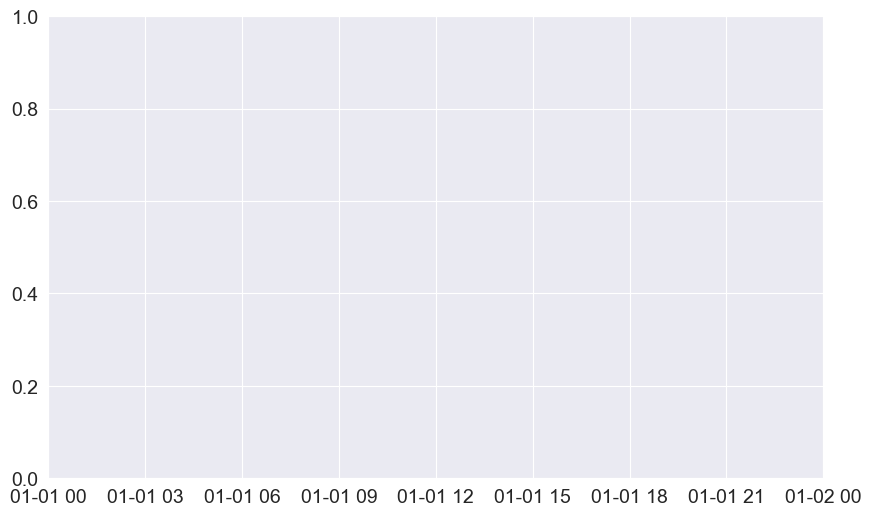

In [182]:
sns.lineplot(df , x = 'Date' , y = 'Close' , err_style="bars", errorbar=("se", 20) , color = c_green_dark  )
plt.show()

In [146]:
plt.plot()

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
0,2000-03-01,0.000226,0.000122,0.000538,17.000000,0.000324,0.001654,0.000347,0.000000,0.181818,0.000000,0.153846
1,2000-04-01,0.001165,0.000905,0.000838,17.379999,0.000510,0.008388,0.000783,0.000000,0.272727,0.000000,0.230769
2,2000-05-01,0.000461,0.000349,0.000479,16.695000,0.000174,0.007946,0.000344,0.000000,0.363636,0.000000,0.326923
3,2000-06-01,0.000343,0.000122,0.000497,16.830000,0.000240,0.004227,0.000300,0.000000,0.454545,0.000000,0.403846
4,2000-07-01,0.000000,0.000180,0.000308,16.834999,0.000243,0.004233,0.000259,0.000000,0.545455,0.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...,...,...
5254,2020-12-24,0.805961,0.807616,0.814467,1397.099976,0.794226,0.037170,0.809578,0.869565,1.000000,0.766667,0.980769
5255,2020-12-28,0.815118,0.817513,0.830621,1412.849976,0.803270,0.029084,0.821293,0.869565,1.000000,0.900000,1.000000
5256,2020-12-29,0.824538,0.825518,0.840194,1427.199951,0.811510,0.036035,0.829939,0.869565,1.000000,0.933333,1.000000
5257,2020-12-30,0.835601,0.828517,0.836006,1432.500000,0.814554,0.040314,0.830615,0.869565,1.000000,0.966667,1.000000


In [165]:
test_df[numeric_cols] = scaler.inverse_transform(test_df[numeric_cols] )
val_df[numeric_cols] = scaler.inverse_transform(val_df[numeric_cols] )

In [156]:
test_df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Year,Month,Day,WeekOfYear
5755,2023-02-01,1627.000000,1639.750000,1618.550049,1628.699951,1610.234009,2190689.0,1629.000000,2023.0,2.0,1.0,5.0
5756,2023-03-01,1622.199951,1643.000000,1622.199951,1639.349976,1620.763184,4189015.0,1634.849976,2023.0,3.0,1.0,9.0
5757,2023-04-01,1635.000000,1645.750000,1607.000000,1610.050049,1591.795532,5175800.0,1620.933350,2023.0,4.0,1.0,13.0
5758,2023-05-01,1615.000000,1618.050049,1589.400024,1599.699951,1581.562744,5470718.0,1602.383341,2023.0,5.0,1.0,18.0
5759,2023-06-01,1602.000000,1609.099976,1578.199951,1594.400024,1576.322876,4546231.0,1593.899984,2023.0,6.0,1.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2023-06-19,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333,2023.0,6.0,19.0,25.0
5869,2023-06-20,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008,2023.0,6.0,20.0,25.0
5870,2023-06-21,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992,2023.0,6.0,21.0,25.0
5871,2023-06-22,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358,2023.0,6.0,22.0,25.0
